In [1]:
#importing libaries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
#reading file
df=pd.read_csv(r"C:\Users\adars\Downloads\loan prediction.csv")

In [3]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
#first 5 rows:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
#last 5 rows
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [6]:
#dataset info:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
#checking for missing values:
df.isnull().sum()*100/len(df)

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [8]:
#handling missing values:
for i in df.columns:
    if df[i].dtype=='object':
        mode=df[i].mode()[0]
        df[i].fillna(mode,inplace=True)
    else:
        mean=df[i].mean()
        df[i].fillna(mean,inplace=True)

In [9]:
#checking for missing values after removing:
df.isnull().sum()*100/len(df)

Loan_ID              0.0
Gender               0.0
Married              0.0
Dependents           0.0
Education            0.0
Self_Employed        0.0
ApplicantIncome      0.0
CoapplicantIncome    0.0
LoanAmount           0.0
Loan_Amount_Term     0.0
Credit_History       0.0
Property_Area        0.0
Loan_Status          0.0
dtype: float64

In [10]:
#checking all the features value counts:
for i in df.columns:
    print(df[i].value_counts())

Loan_ID
LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: count, Length: 614, dtype: int64
Gender
Male      502
Female    112
Name: count, dtype: int64
Married
Yes    401
No     213
Name: count, dtype: int64
Dependents
0     360
1     102
2     101
3+     51
Name: count, dtype: int64
Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64
Self_Employed
No     532
Yes     82
Name: count, dtype: int64
ApplicantIncome
2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: count, Length: 505, dtype: int64
CoapplicantIncome
0.0       273
2500.0      5
2083.0      5
1666.0      5
2250.0      3
         ... 
2791.0      1
1010.0      1
1695.0      1
2598.0      1
240.0       1
Name: count, Length: 287, dtype: int64
LoanAmount
146.412162    22
120.000000    20
110.000000    17
100.000000    15
160.000000  

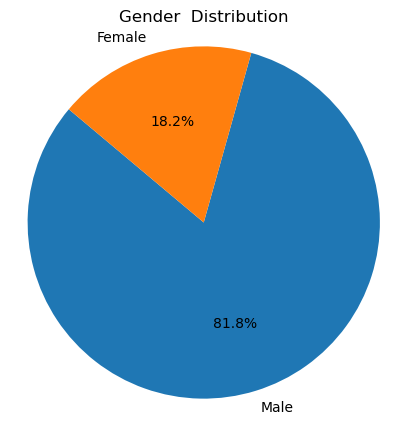

In [11]:
#Distribution of Gender:
gender_counts = df['Gender'].value_counts()
labels = gender_counts.index
sizes = gender_counts.values

plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Gender  Distribution')
plt.axis('equal')  
plt.show()

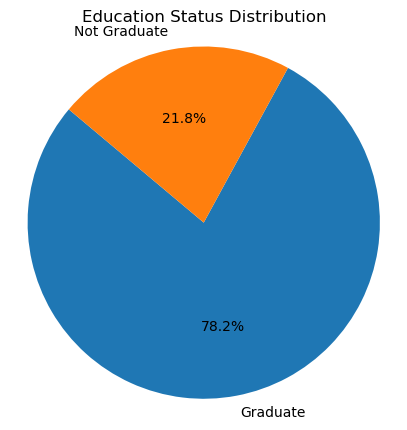

In [12]:
#Distribution of Education:
gender_counts = df['Education'].value_counts()
labels = gender_counts.index
sizes = gender_counts.values

plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Education Status Distribution')
plt.axis('equal')  
plt.show()

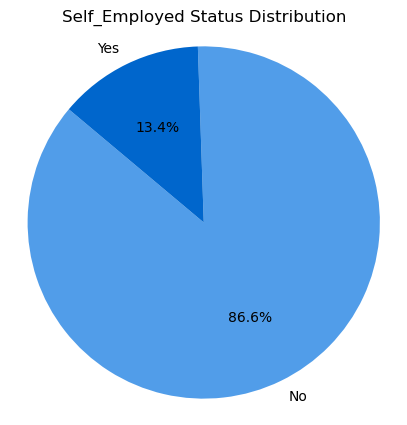

In [13]:
#Self_Employed Status Distribution
gender_counts = df['Self_Employed'].value_counts()
labels = gender_counts.index
sizes = gender_counts.values
custom_colors = ['#519DE9', '#06C']
plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140,colors=custom_colors)
plt.title('Self_Employed Status Distribution')
plt.axis('equal')  
plt.show()

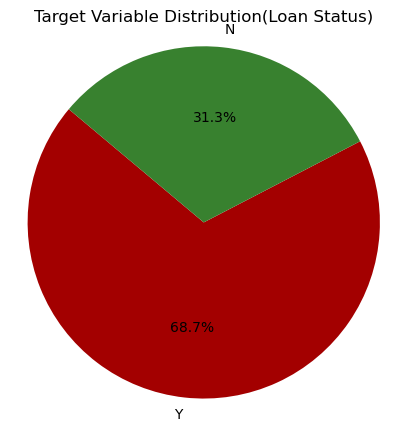

In [14]:
#Target variable:
gender_counts = df['Loan_Status'].value_counts()
labels = gender_counts.index
sizes = gender_counts.values
custom_colors = ['#A30000', '#38812F']
plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140,colors=custom_colors)
plt.title('Target Variable Distribution(Loan Status)')
plt.axis('equal')  
plt.show()

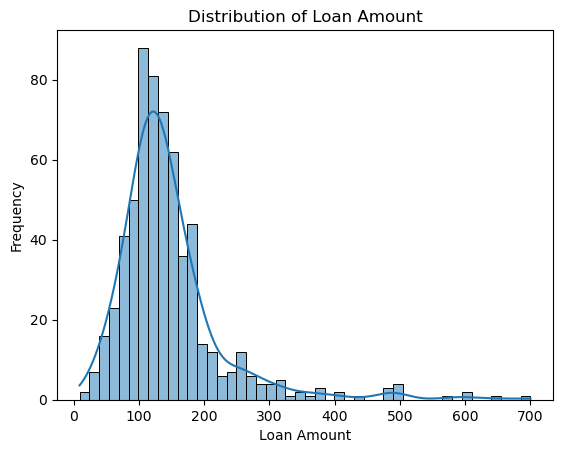

In [15]:
sns.histplot(df['LoanAmount'], kde=True)
plt.title('Distribution of Loan Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

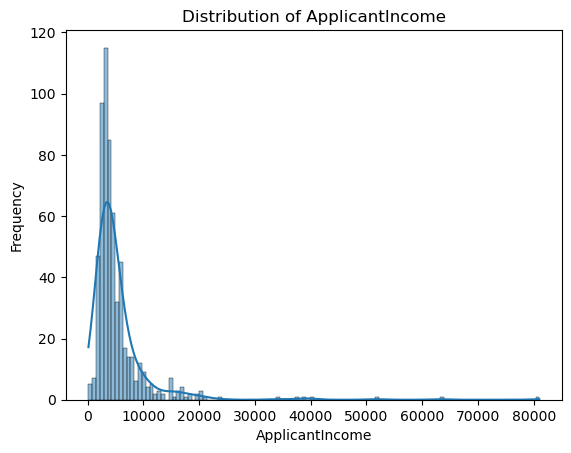

In [16]:
sns.histplot(df['ApplicantIncome'],kde=True)
plt.title('Distribution of ApplicantIncome')
plt.xlabel('ApplicantIncome')
plt.ylabel('Frequency')
plt.show()

In [17]:
df=df.drop(['Loan_ID'],axis=1)

In [18]:
df["Gender"]=df["Gender"].map({"Male":1,"Female":0})
df["Married"]=df["Married"].map({"Yes":1,"No":0})
df["Dependents"]=df["Dependents"].map({"1":1,"0":0,"3+":3})
df["Education"]=df["Education"].map({"Graduate":1,"Not Graduate":0})
df["Property_Area"]=df["Property_Area"].map({"Semiurban":3,"Rural":0,"Urban":1})
df["Loan_Status"]=df["Loan_Status"].map({"Y":1,"N":0})
df["Self_Employed"]=df["Self_Employed"].map({"Yes":1,"No":0})

In [19]:
#handling missing values:
for i in df.columns:
    if df[i].dtype=='object':
        mode=df[i].mode()[0]
        df[i].fillna(mode,inplace=True)
    else:
        mean=df[i].mean()
        df[i].fillna(mean,inplace=True)

In [20]:
for i in df.columns:
    print(i)

Gender
Married
Dependents
Education
Self_Employed
ApplicantIncome
CoapplicantIncome
LoanAmount
Loan_Amount_Term
Credit_History
Property_Area
Loan_Status


In [21]:
#data spliting into X and Y:
X=df.drop(['Loan_Status'],axis=1)

In [22]:
Y=df['Loan_Status']

In [23]:
Y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [24]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0.000000,1,0,5849,0.0,146.412162,360.0,1.0,1,1
1,1,1,1.000000,1,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0.000000,1,1,3000,0.0,66.000000,360.0,1.0,1,1
3,1,1,0.000000,0,0,2583,2358.0,120.000000,360.0,1.0,1,1
4,1,0,0.000000,1,0,6000,0.0,141.000000,360.0,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0.000000,1,0,2900,0.0,71.000000,360.0,1.0,0,1
610,1,1,3.000000,1,0,4106,0.0,40.000000,180.0,1.0,0,1
611,1,1,1.000000,1,0,8072,240.0,253.000000,360.0,1.0,1,1
612,1,1,0.497076,1,0,7583,0.0,187.000000,360.0,1.0,1,1


In [25]:
#Training and Spliting 
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25)

In [26]:
nb_clf = GaussianNB()
nb_clf.fit(x_train, y_train)
# Make predictions on the test set
nb_predictions = nb_clf.predict(x_test)
# Evaluate model performance
nb_accuracy = accuracy_score(y_test, nb_predictions)
nb_precision = precision_score(y_test, nb_predictions)
nb_recall = recall_score(y_test, nb_predictions)
nb_f1 = f1_score(y_test, nb_predictions)

print("Naive Bayes Accuracy:", nb_accuracy)
print("Naive Bayes Precision:", nb_precision)
print("Naive Bayes Recall:", nb_recall)
print("Naive Bayes F1-score:", nb_f1)

Naive Bayes Accuracy: 0.7922077922077922
Naive Bayes Precision: 0.7786259541984732
Naive Bayes Recall: 0.9714285714285714
Naive Bayes F1-score: 0.864406779661017


In [27]:
# Create and train the Decision Tree model
dt_clf = DecisionTreeClassifier()
dt_clf.fit(x_train, y_train)
# Make predictions on the test set
dt_predictions = dt_clf.predict(x_test)
# Evaluate model performance
dt_accuracy = accuracy_score(y_test, dt_predictions)
dt_precision = precision_score(y_test, dt_predictions)
dt_recall = recall_score(y_test, dt_predictions)
dt_f1 = f1_score(y_test, dt_predictions)

print("Decision Tree Accuracy:", dt_accuracy)
print("Decision Tree Precision:", dt_precision)
print("Decision Tree Recall:", dt_recall)
print("Decision Tree F1-score:", dt_f1)

Decision Tree Accuracy: 0.7077922077922078
Decision Tree Precision: 0.7777777777777778
Decision Tree Recall: 0.8
Decision Tree F1-score: 0.7887323943661971


In [28]:
lr_clf = LogisticRegression()
lr_clf.fit(x_train, y_train)
# Make predictions on the test set
lr_predictions = lr_clf.predict(x_test)
# Evaluate model performance
lr_accuracy = accuracy_score(y_test, lr_predictions)
lr_precision = precision_score(y_test, lr_predictions)
lr_recall = recall_score(y_test, lr_predictions)
lr_f1 = f1_score(y_test, lr_predictions)

print("Logistic Regression Accuracy:", lr_accuracy)
print("Logistic Regression Precision:", lr_precision)
print("Logistic Regression Recall:", lr_recall)
print("Logistic Regression F1-score:", lr_f1)

Logistic Regression Accuracy: 0.7142857142857143
Logistic Regression Precision: 0.7401574803149606
Logistic Regression Recall: 0.8952380952380953
Logistic Regression F1-score: 0.8103448275862069


C:\Users\adars\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


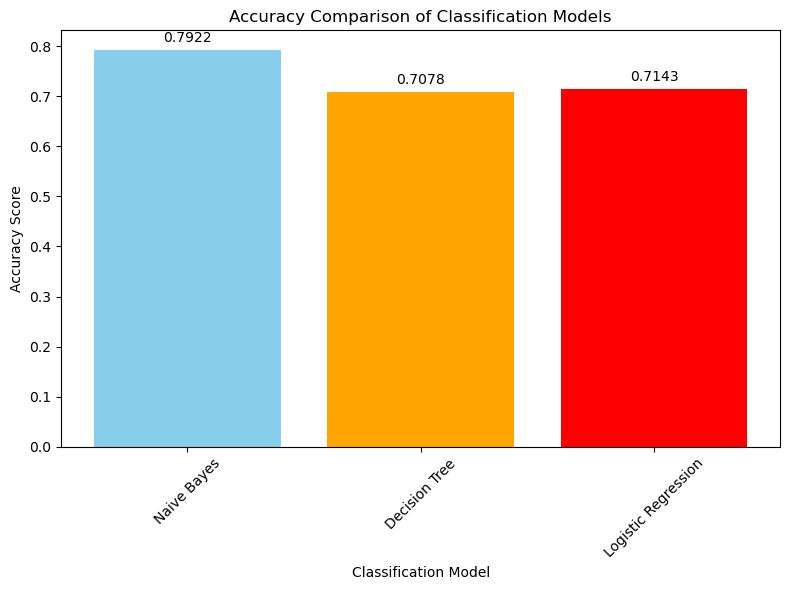

In [29]:
model_names = ["Naive Bayes", "Decision Tree", "Logistic Regression"]
accuracy_scores = [nb_accuracy, dt_accuracy, lr_accuracy]

# Create a bar chart
plt.figure(figsize=(8, 6)) 
bars = plt.bar(model_names, accuracy_scores, color=['skyblue', 'orange', 'red', 'purple'])
for bar, score in zip(bars, accuracy_scores):
    yval = bar.get_height() 
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.01, f"{score:.4f}", ha='center', va='bottom')
plt.xlabel("Classification Model")
plt.ylabel("Accuracy Score")
plt.title("Accuracy Comparison of Classification Models")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [30]:
data1 = {
    "Gender": "Female",
    "Married": "Yes",
    "Dependents": 0,
    "Education": "Graduate",
    "Self_Employed": "No",
    "ApplicantIncome": 60000,
    "CoapplicantIncome": 40000,
    "LoanAmount": 200000,  
    "Loan_Amount_Term": 36,
    "Credit_History": 1,
    "Property_Area": "Semiurban"
}

In [31]:
data2 = {
    "Gender": "Male",
    "Married": "No",
    "Dependents": 2,
    "Education": "Not Graduate",
    "Self_Employed": "Yes",
    "ApplicantIncome": 40000,
    "CoapplicantIncome": 20000,
    "LoanAmount": 150000,  
    "Loan_Amount_Term": 24,
    "Credit_History": 0,
    "Property_Area": "Rural"
}

In [46]:
data3 = {
    "Gender": "Male",
    "Married": "Yes",
    "Dependents": 3,
    "Education": "Graduate",
    "Self_Employed": "Yes",
    "ApplicantIncome": 70,
    "CoapplicantIncome": 63,
    "LoanAmount": 25,  
    "Loan_Amount_Term": 2,
    "Credit_History": 1,
    "Property_Area": "Semiurban"
}

In [47]:
df = pd.DataFrame([data1,data2,data3])


In [48]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Female,Yes,0,Graduate,No,60000,40000,200000,36,1,Semiurban
1,Male,No,2,Not Graduate,Yes,40000,20000,150000,24,0,Rural
2,Male,Yes,3,Graduate,Yes,70,63,25,2,1,Semiurban


In [49]:
categorical_features = ["Gender", "Married", "Education", "Self_Employed", "Property_Area"]
le = LabelEncoder()
for col in categorical_features:
    df[col] = le.fit_transform(df[col])

In [50]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,1,0,0,0,60000,40000,200000,36,1,1
1,1,0,2,1,1,40000,20000,150000,24,0,0
2,1,1,3,0,1,70,63,25,2,1,1


In [64]:
#Using Navie Bayes
prediction_nb =nb_clf.predict(df)

In [65]:
prediction_row_0 = prediction_nb[0]
prediction_row_1 = prediction_nb[1]
prediction_row_2 = prediction_nb[2]

In [66]:
for i, prediction in enumerate(prediction_nb):
    if prediction == 1:
        print(f"Predicted Loan Status for Row {i}: Approved")
    elif prediction == 0:
        print(f"Predicted Loan Status for Row {i}: Rejected")
    else:
        print(f"Unexpected prediction outcome for Row {i}")

Predicted Loan Status for Row 0: Approved
Predicted Loan Status for Row 1: Approved
Predicted Loan Status for Row 2: Approved


In [54]:
#Using Decision Tree
prediction_dt =dt_clf.predict(df)

In [55]:
prediction_row_0 = prediction_dt[0]
prediction_row_1 = prediction_dt[1]
prediction_row_2 = prediction_dt[2]

In [56]:
for i, prediction in enumerate(prediction_dt):
    if prediction == 1:
        print(f"Predicted Loan Status for Row {i}: Approved")
    elif prediction == 0:
        print(f"Predicted Loan Status for Row {i}: Rejected")
    else:
        print(f"Unexpected prediction outcome for Row {i}")

Predicted Loan Status for Row 0: Approved
Predicted Loan Status for Row 1: Approved
Predicted Loan Status for Row 2: Rejected


In [57]:
#Using LogisticRegression
prediction_lr =lr_clf.predict(df)

In [58]:
prediction_row_0 = prediction_lr[0]
prediction_row_1 = prediction_lr[1]
prediction_row_2 = prediction_lr[2]

In [59]:
for i, prediction in enumerate(prediction_dt):
    if prediction == 1:
        print(f"Predicted Loan Status for Row {i}: Approved")
    elif prediction == 0:
        print(f"Predicted Loan Status for Row {i}: Rejected")
    else:
        print(f"Unexpected prediction outcome for Row {i}")

Predicted Loan Status for Row 0: Approved
Predicted Loan Status for Row 1: Approved
Predicted Loan Status for Row 2: Rejected
